<a href="https://colab.research.google.com/github/Hbrand03/Intro_to_ML_Work/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1


Training with learning rate: 0.1
Epoch 500, Loss: 2.1104660034179688
Epoch 1000, Loss: 2.0916807651519775
Epoch 1500, Loss: 2.0915849208831787
Epoch 2000, Loss: 2.091503143310547
Epoch 2500, Loss: 2.091431140899658
Epoch 3000, Loss: 2.0913641452789307
Epoch 3500, Loss: 2.091303825378418
Epoch 4000, Loss: 2.0912492275238037
Epoch 4500, Loss: 2.091200351715088
Epoch 5000, Loss: 2.091153621673584
Final loss with learning rate 0.1: 2.091153621673584

Training with learning rate: 0.01
Epoch 500, Loss: 29.752357482910156
Epoch 1000, Loss: 14.516005516052246
Epoch 1500, Loss: 7.6722636222839355
Epoch 2000, Loss: 4.5982279777526855
Epoch 2500, Loss: 3.217459201812744
Epoch 3000, Loss: 2.5972542762756348
Epoch 3500, Loss: 2.3186681270599365
Epoch 4000, Loss: 2.1935317516326904
Epoch 4500, Loss: 2.137319326400757
Epoch 5000, Loss: 2.1120667457580566
Final loss with learning rate 0.01: 2.1120667457580566

Training with learning rate: 0.001
Epoch 500, Loss: 61.31474304199219
Epoch 1000, Loss: 49.

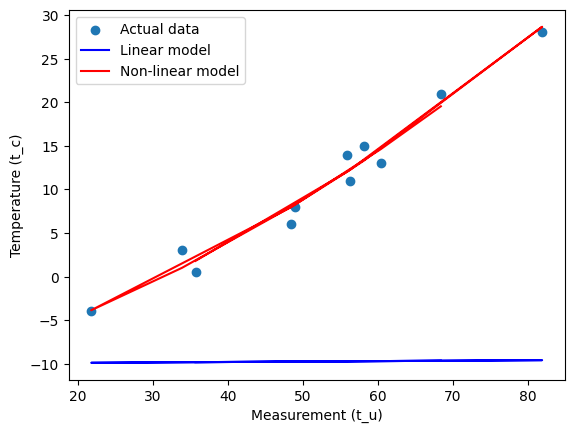

In [2]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Data for temperature in Celsius and measurement values
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

# Normalize input data to improve training stability
t_u = t_u / 100.0

# Non-linear model definition
def model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

# Loss function (Mean Squared Error)
def loss_fn(t_p, t_c):
    return ((t_p - t_c)**2).mean()

# Training loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    w1, w2, b = params
    optimizer = optim.SGD([w1, w2, b], lr=learning_rate)

    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, w1, w2, b)  # Predict temperature
        loss = loss_fn(t_p, t_c)     # Calculate loss

        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update parameters

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")  # Debug print

    return w1, w2, b, loss.item()

# Experimenting with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_params = None
lowest_loss = float('inf')

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    # Initialize weights and bias randomly for each experiment
    w1 = torch.randn((), requires_grad=True)
    w2 = torch.randn((), requires_grad=True)
    b = torch.randn((), requires_grad=True)

    w1, w2, b, final_loss = training_loop(5000, lr, (w1, w2, b), t_u, t_c)
    print(f"Final loss with learning rate {lr}: {final_loss}")

    if final_loss < lowest_loss:
        lowest_loss = final_loss
        best_params = (w1, w2, b)

# Check if best_params was updated
if best_params is None:
    raise ValueError("No valid model was found. Check if the training loop is working correctly.")

# Best parameters from non-linear model
w1, w2, b = best_params
print(f"\nBest parameters: w1 = {w1.item()}, w2 = {w2.item()}, b = {b.item()}")
print(f"Lowest loss achieved: {lowest_loss}")

# Linear model function for comparison
def linear_model(t_u, w, b):
    return w * t_u + b

# Example linear model parameters (replace with actual if available)
w_linear = torch.tensor(0.5)
b_linear = torch.tensor(-10.0)

# Predictions for both models
t_p_nonlinear = model(t_u, w1, w2, b)
t_p_linear = linear_model(t_u, w_linear, b_linear)

# Plotting the comparison
plt.scatter(t_u * 100, t_c, label='Actual data')  # Denormalize t_u for visualization
plt.plot(t_u * 100, t_p_linear.detach(), label='Linear model', color='blue')
plt.plot(t_u * 100, t_p_nonlinear.detach(), label='Non-linear model', color='red')
plt.xlabel("Measurement (t_u)")
plt.ylabel("Temperature (t_c)")
plt.legend()
plt.show()


Problem 2

In [3]:
import pandas as pd
import torch
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
housing_data = pd.read_csv(url)

# Step 2: Select relevant features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

# Split the data into features (X) and target (y)
X = housing_data[features]
y = housing_data[target]

# Normalize features
X = (X - X.mean()) / X.std()

# Convert to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Step 3: Split data into training and validation sets (80%-20%)
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Step 4: Define the linear regression model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)  # One output for housing price

    def forward(self, x):
        return self.linear(x)

# Step 5: Define the training function
def train_model(model, optimizer, n_epochs, X_train, y_train, X_val, y_val):
    loss_fn = torch.nn.MSELoss()
    for epoch in range(1, n_epochs + 1):
        # Training phase
        y_pred = model(X_train)  # Forward pass
        loss = loss_fn(y_pred, y_train)  # Compute training loss

        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Validation phase
        with torch.no_grad():
            y_val_pred = model(X_val)  # Predictions on validation set
            val_loss = loss_fn(y_val_pred, y_val)  # Validation loss

        # Print losses every 500 epochs
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    return model, loss.item(), val_loss.item()

# Step 6: Train the model with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_model = None
lowest_val_loss = float('inf')

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    # Initialize the model and optimizer
    model = LinearRegressionModel(input_dim=X_train.shape[1])
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Train the model
    trained_model, train_loss, val_loss = train_model(model, optimizer, 5000, X_train, y_train, X_val, y_val)

    # Save the best model based on validation loss
    if val_loss < lowest_val_loss:
        lowest_val_loss = val_loss
        best_model = trained_model

    print(f"Final Training Loss: {train_loss:.4f}, Final Validation Loss: {val_loss:.4f}")

# Step 7: Display the best model's validation loss
print(f"\nBest Model Validation Loss: {lowest_val_loss:.4f}")



Training with learning rate: 0.1
Epoch 500, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 1000, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 1500, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 2000, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 2500, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 3000, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 3500, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 4000, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 4500, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 5000, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Final Training Loss: 1350008045568.0000, Final Validation Loss: 2292721647616.0000

Training with learning rate: 0.01
Epoch 500, Training

Problem 3

In [5]:
import pandas as pd
import torch
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
housing_data = pd.read_csv(url)

# Step 2: Preprocess categorical data
# Convert "yes"/"no" to 1/0
for column in housing_data.select_dtypes(include='object').columns:
    housing_data[column] = housing_data[column].map({'yes': 1, 'no': 0})

# Step 3: Select all features and target
features = housing_data.columns[:-1]  # All columns except the last ('price')
target = 'price'

# Split the data into features (X) and target (y)
X = housing_data[features]
y = housing_data[target]

# Normalize features
X = (X - X.mean()) / X.std()

# Convert to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Step 4: Split data into training and validation sets (80%-20%)
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Step 5: Define the linear regression model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)  # One output for housing price

    def forward(self, x):
        return self.linear(x)

# Step 6: Define the training function
def train_model(model, optimizer, n_epochs, X_train, y_train, X_val, y_val):
    loss_fn = torch.nn.MSELoss()
    for epoch in range(1, n_epochs + 1):
        # Training phase
        y_pred = model(X_train)  # Forward pass
        loss = loss_fn(y_pred, y_train)  # Compute training loss

        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Validation phase
        with torch.no_grad():
            y_val_pred = model(X_val)  # Predictions on validation set
            val_loss = loss_fn(y_val_pred, y_val)  # Validation loss

        # Print losses every 500 epochs
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    return model, loss.item(), val_loss.item()

# Step 7: Train the model with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_model = None
lowest_val_loss = float('inf')

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    # Initialize the model and optimizer
    model = LinearRegressionModel(input_dim=X_train.shape[1])
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Train the model
    trained_model, train_loss, val_loss = train_model(model, optimizer, 5000, X_train, y_train, X_val, y_val)

    # Save the best model based on validation loss
    if val_loss < lowest_val_loss:
        lowest_val_loss = val_loss
        best_model = trained_model

    print(f"Final Training Loss: {train_loss:.4f}, Final Validation Loss: {val_loss:.4f}")

# Step 8: Display the best model's validation loss
print(f"\nBest Model Validation Loss: {lowest_val_loss:.4f}")



Training with learning rate: 0.1
Epoch 500, Training Loss: 1.8541, Validation Loss: 2.3440
Epoch 1000, Training Loss: 1.8518, Validation Loss: 2.3481
Epoch 1500, Training Loss: 1.8654, Validation Loss: 2.3440
Epoch 2000, Training Loss: 1.8706, Validation Loss: 2.3440
Epoch 2500, Training Loss: 1.8645, Validation Loss: 2.3481
Epoch 3000, Training Loss: 1.8645, Validation Loss: 2.3440
Epoch 3500, Training Loss: 1.8536, Validation Loss: 2.3440
Epoch 4000, Training Loss: 1.8673, Validation Loss: 2.3440
Epoch 4500, Training Loss: 1.8700, Validation Loss: 2.3481
Epoch 5000, Training Loss: 1.8542, Validation Loss: 2.3440
Final Training Loss: 1.8542, Final Validation Loss: 2.3440

Training with learning rate: 0.01
Epoch 500, Training Loss: 8400651776.0000, Validation Loss: 14713819136.0000
Epoch 1000, Training Loss: 133209792.0000, Validation Loss: 234430368.0000
Epoch 1500, Training Loss: 2115069.2500, Validation Loss: 3723508.2500
Epoch 2000, Training Loss: 33880.6133, Validation Loss: 5987